# Visualizing Information Gain

## Imports

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Sample Data
Suppose we have two species of birds and measurements of their beak depths. We can attempt to predict the species of a new beak depth measurement by finding a threshold that maximizes information gain. 

In [2]:
birds = pd.DataFrame(
    {'d': [13.6, 14.0, 14.6, 15.2, 15.8, 14.7, 15.8, 16.7, 17.1, 18.0],
    'species': ['G. fuliginosa']*5 + ['G. fortis']*5}
)

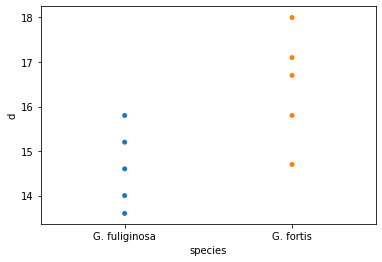

In [3]:
sns.swarmplot(x='species', y='d', data=birds)

plt.show()

## Shannon Entropy and Information Gain
Shannon entropy can be though of as a measure of the diversity of a data set. It is reflected in the equation

$$H(X) = -\sum_{i=1}^n p_i \log_2 p_i$$

where $p_i$ represent the probability of finding a class $i$ within our data set $X$. A large shannon entropy corresponds to a stratified data set (roughly equal $p_i$'s). A low shannon entropy correspond to one class dominating a data set (one $p$ is large).

Information gain can be used to measure how a particular threshold or partition split a data set. It is defined as

$$IG(X, t) = H(X) - H(X < t)\frac{|X < t|}{|X|} - H(X > t)\frac{|X > t|}{|X|}$$

Or, more succinctly, 

$$IG = H(\text{original}) - H(\text{left})\text{Proportion}(\text{left}) - H(\text{right})\text{Proportion}(\text{right})$$

This value can, when maximized, tell us what value would be best to split our data along to use in a classification problem. The maximum information gain (a perfect split) is equal to the entropy of the original.

In [4]:
def shannon_entropy(series):
    return sum([-p * np.log2(p) for p in series.value_counts()/len(series)])
    
def information_gain(df, t, data_col=None, target_col=None):
    parent_entropy = shannon_entropy(df[target_col])
    left_data = df[target_col].loc[df[data_col] < t]
    left_entropy = shannon_entropy(left_data)
    right_data = df[target_col].loc[df[data_col] >= t]
    right_entropy = shannon_entropy(right_data)
    return parent_entropy - len(left_data)/len(df) * left_entropy - len(right_data)/len(df) * right_entropy

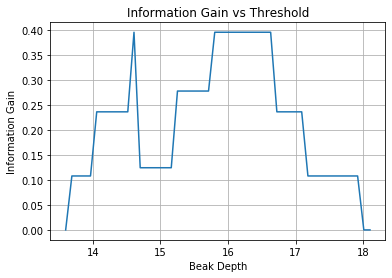

In [5]:
t = np.linspace(birds['d'].min(), birds['d'].max()+.1)
gain = [information_gain(birds, thr, data_col='d', target_col='species') for thr in t]
plt.plot(t, gain)
plt.title('Information Gain vs Threshold')
plt.xlabel('Beak Depth')
plt.ylabel('Information Gain')
plt.grid(True)
plt.show()

# Discussion
As can be seen, beak depth values around 16 would be a good choice for a threshold. This make intuitive sense looking at the swarm plot shown previously; G. fuliginosa if below 16 and G. fortis if above.